# Machine Learning Study Case : Employee Attrition for Healthcare

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data26DEC 01 2024

# Features Description

## **EmployeeID**
- **Description**: Unique identifier for each employee.

## **Age**
- **Description**: Age of the employee.

## **Attrition**
- **Description**: Indicates whether the employee left the company (Yes/No).

## **BusinessTravel**
- **Description**: Frequency of business travel (e.g., `Travel_Rarely`, `Travel_Frequently`).

## **DailyRate**
- **Description**: Daily salary rate of the employee.

## **Department**
- **Description**: Department where the employee works (e.g., `Cardiology`, `Maternity`).

## **DistanceFromHome**
- **Description**: Distance of the employee's home from the workplace (in kilometers or miles).

## **Education**
- **Description**: Level of education of the employee (coded as integers).

## **EducationField**
- **Description**: Field of study or specialization (e.g., `Life Sciences`, `Medical`).

## **EmployeeCount**
- **Description**: Likely a constant value, possibly a placeholder.

## **RelationshipSatisfaction**
- **Description**: Employee’s satisfaction with personal relationships (coded as integers).

## **StandardHours**
- **Description**: Standard number of working hours (appears to be 80 for all employees).

## **Shift**
- **Description**: Work shift (e.g., `Day`, `Night`).

## **TotalWorkingYears**
- **Description**: Total number of years the employee has worked.

## **TrainingTimesLastYear**
- **Description**: Number of training sessions attended in the last year.

## **WorkLifeBalance**
- **Description**: Self-reported work-life balance score (coded as integers).

## **YearsAtCompany**
- **Description**: Number of years the employee has been at the current company.

## **YearsInCurrentRole**
- **Description**: Number of years the employee has been in their current role.

## **YearsSinceLastPromotion**
- **Description**: Number of years since the employee's last promotion.

## **YearsWithCurrManager**
- **Description**: Number of years the employee has worked with their current manager.


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from collections import Counter
from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [84]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Employee Attrition for HC/watson_healthcare_modified.csv")

In [86]:
data.head(3)

EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   
2                 2          2          Other              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1            80      0                  8   
1                         4            80      1                 10   
2                         2            80      0                  7   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                      0               1               6                  4   
1                      3               3              10                  7   
2                      3               3               0                  0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  

[3 rows x 35 columns]

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [90]:
data.describe

<bound method NDFrame.describe of       EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0        1313919   41        No      Travel_Rarely       1102  Cardiology   
1        1200302   49        No  Travel_Frequently        279   Maternity   
2        1060315   37       Yes      Travel_Rarely       1373   Maternity   
3        1272912   33        No  Travel_Frequently       1392   Maternity   
4        1414939   27        No      Travel_Rarely        591   Maternity   
...          ...  ...       ...                ...        ...         ...   
1671     1117656   26       Yes      Travel_Rarely        471   Neurology   
1672     1152327   46        No      Travel_Rarely       1125  Cardiology   
1673     1812428   20        No      Travel_Rarely        959   Maternity   
1674     1812429   39        No      Travel_Rarely        466   Neurology   
1675     1152329   27        No      Travel_Rarely        511  Cardiology   

      DistanceFromHome  Education    Educ

In [92]:
data.isnull().sum()


EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [94]:
# Create a DataFrame with selected columns for the analysis
data_df = data[['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 
                'Department', 'DistanceFromHome', 'Education', 'EducationField', 
                'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 
                'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 
                'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 
                'RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 
                'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
                'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]


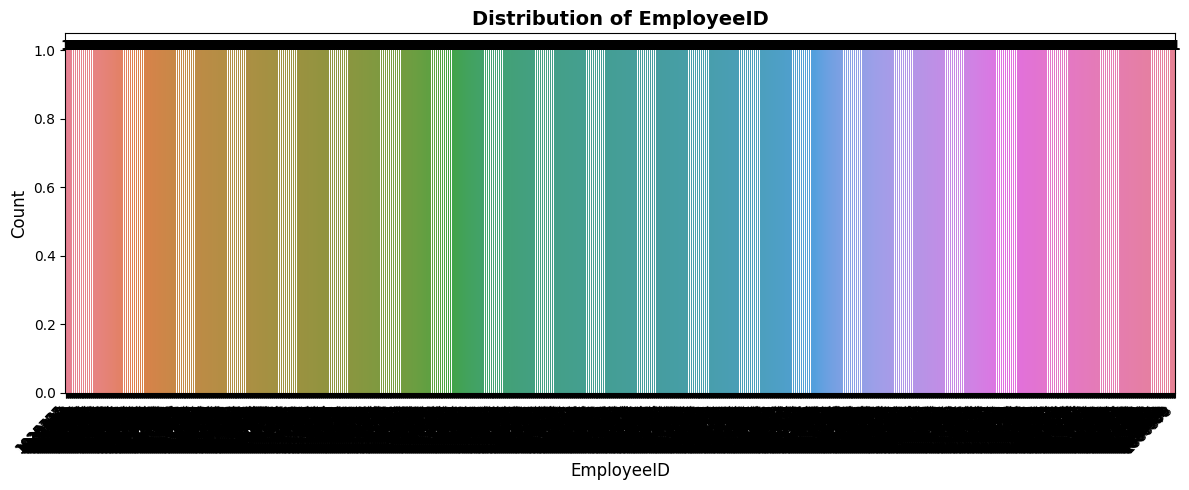

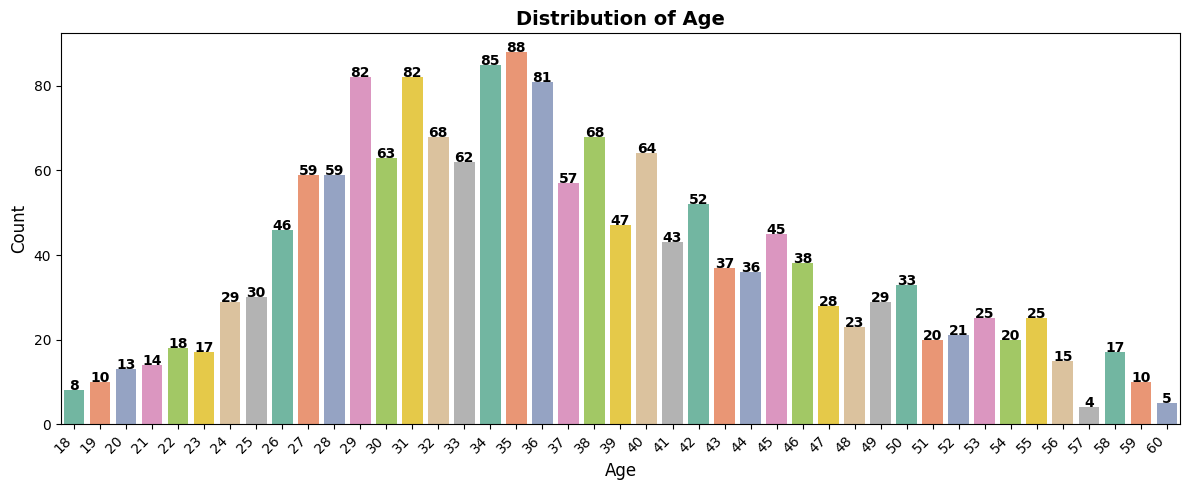

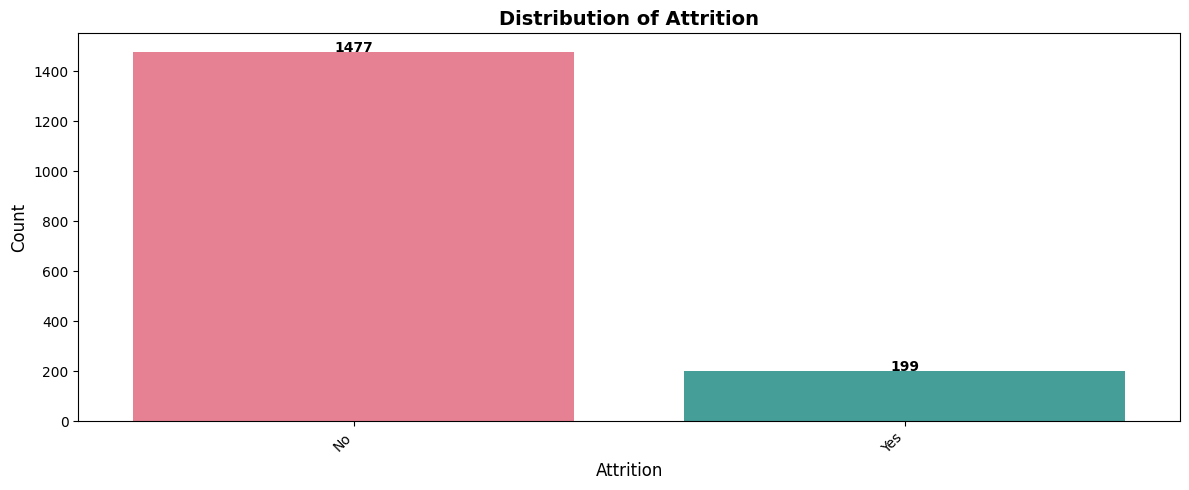

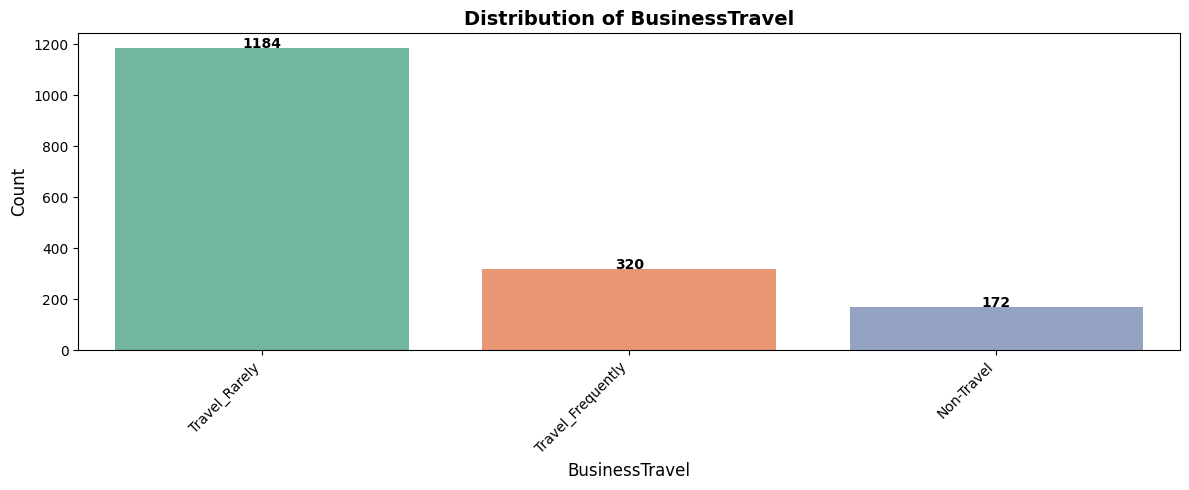

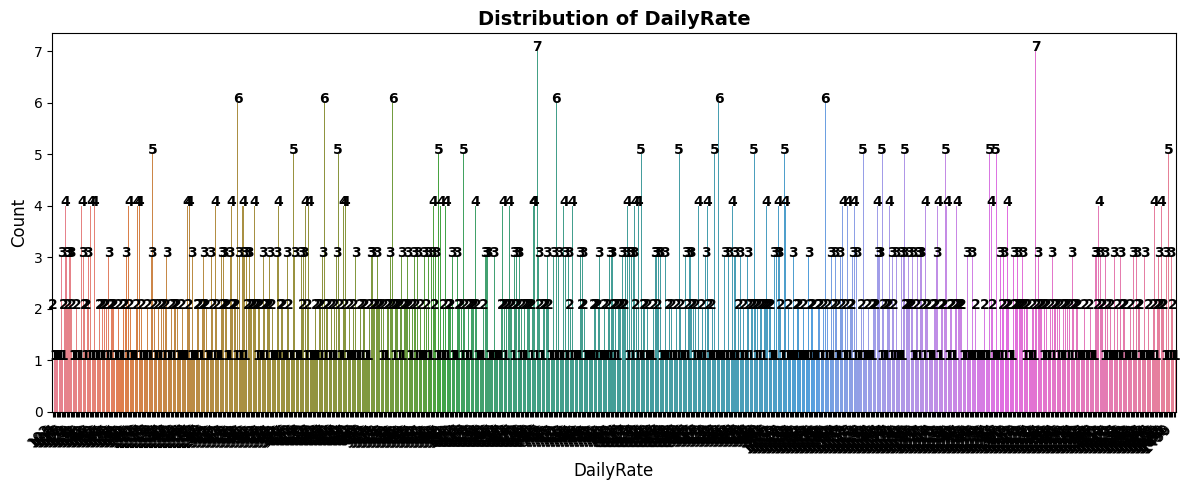

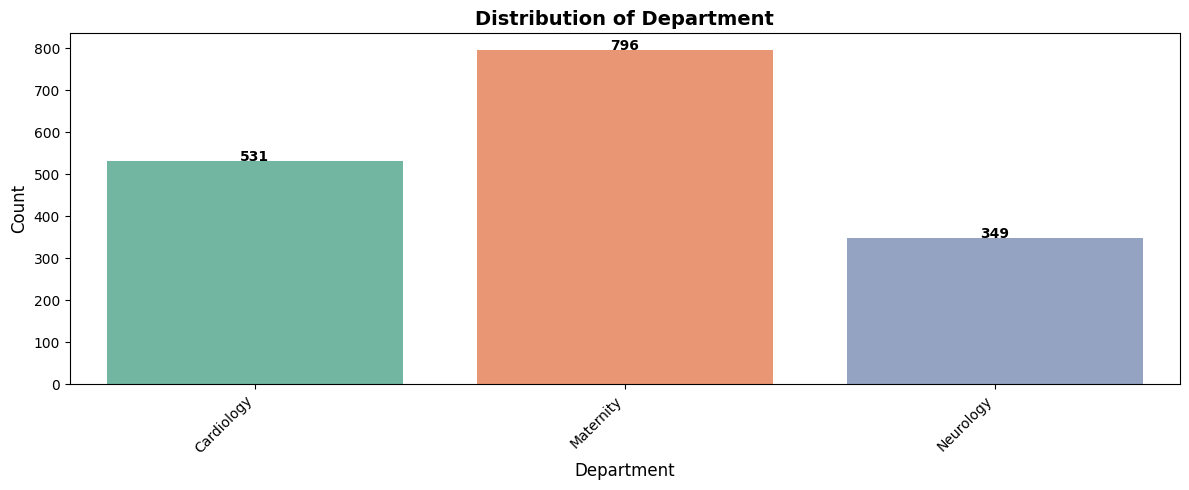

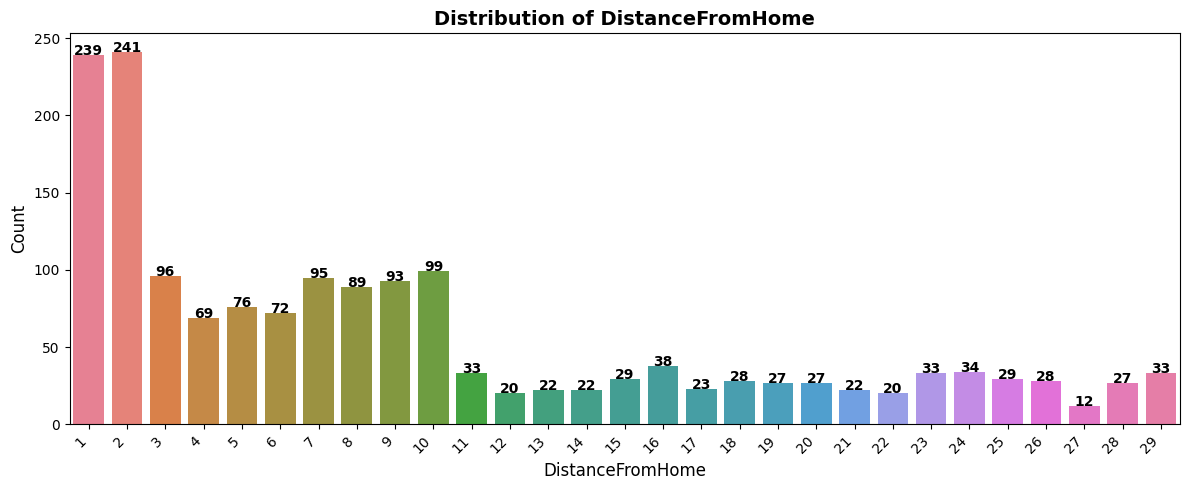

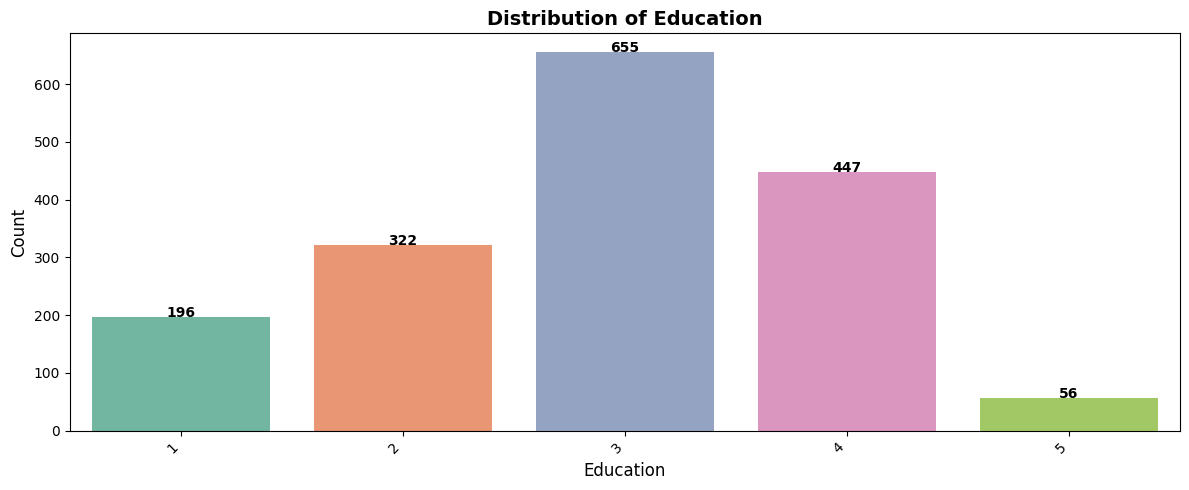

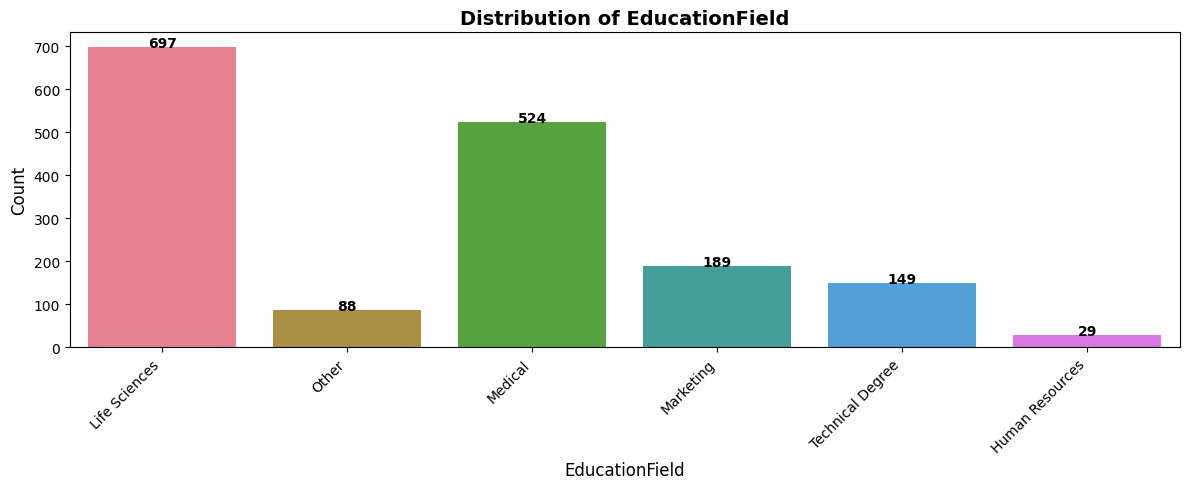

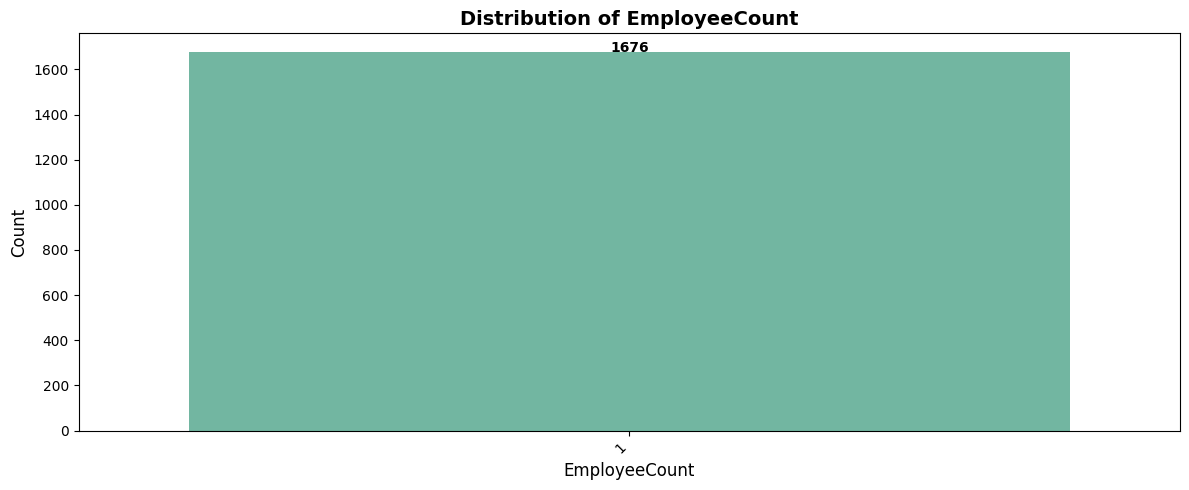

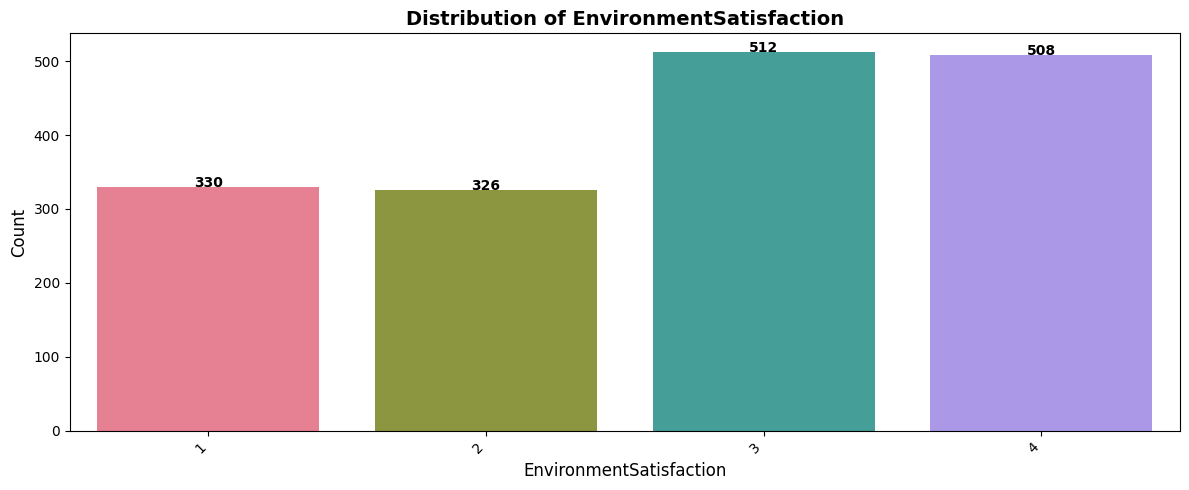

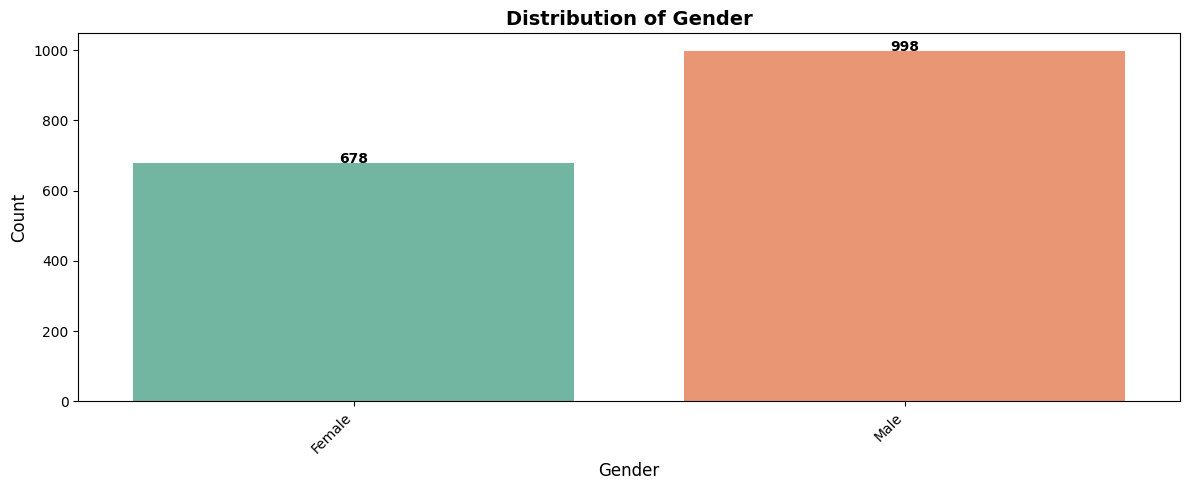

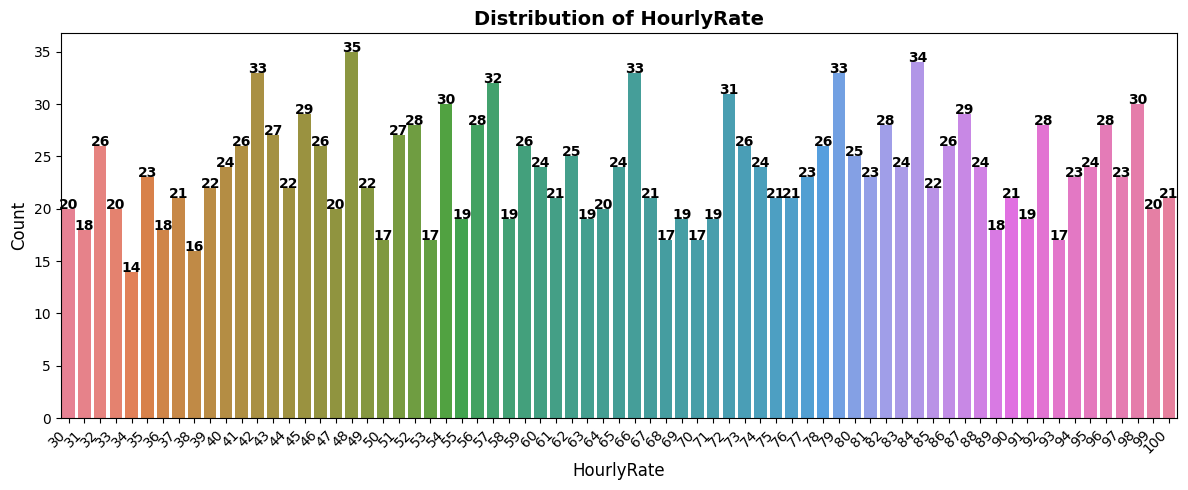

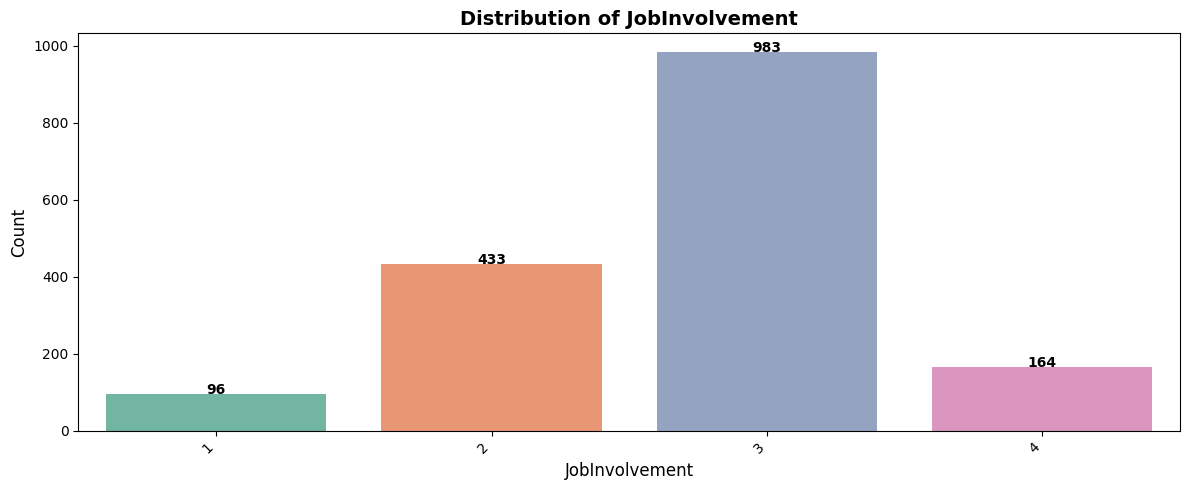

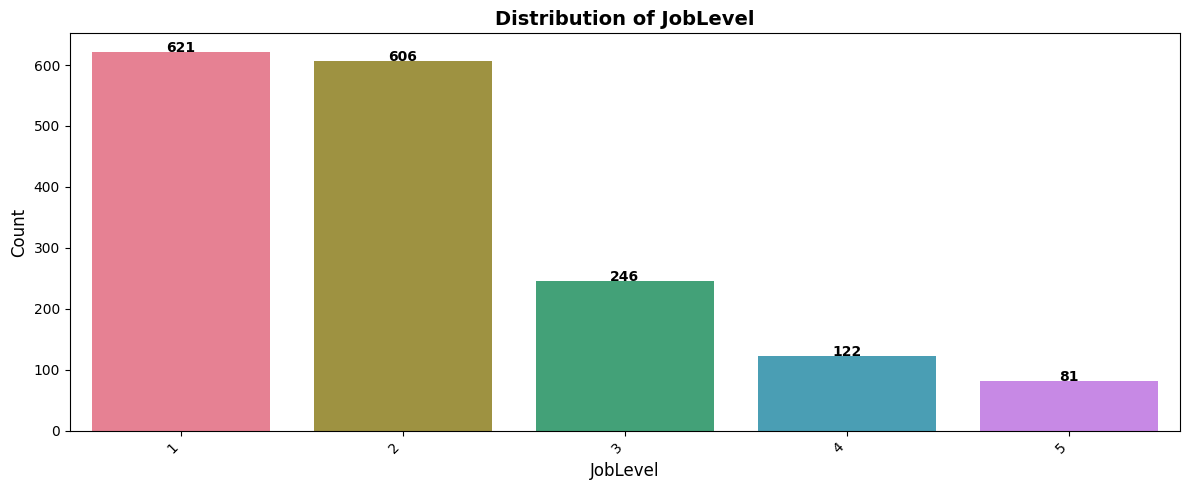

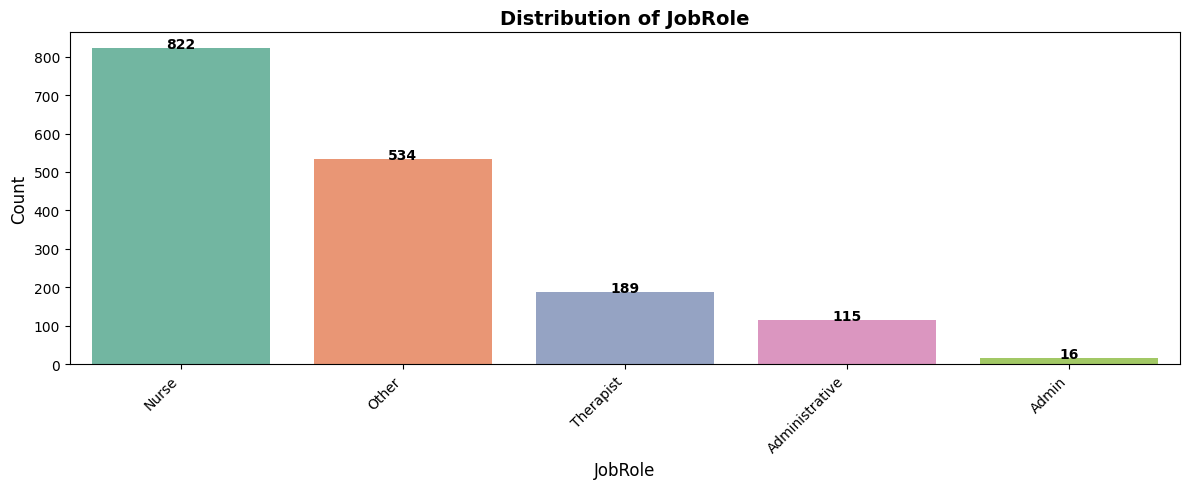

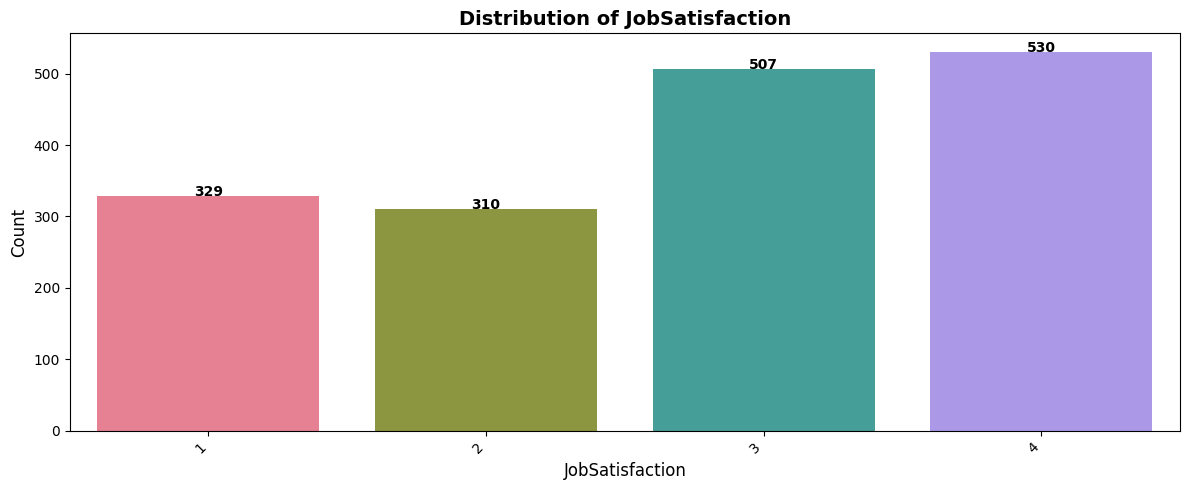

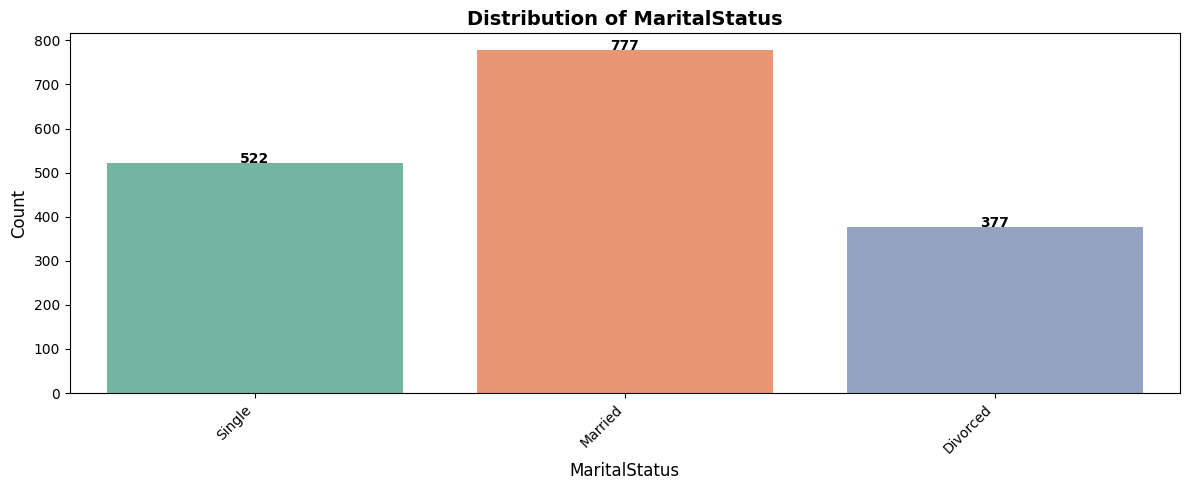

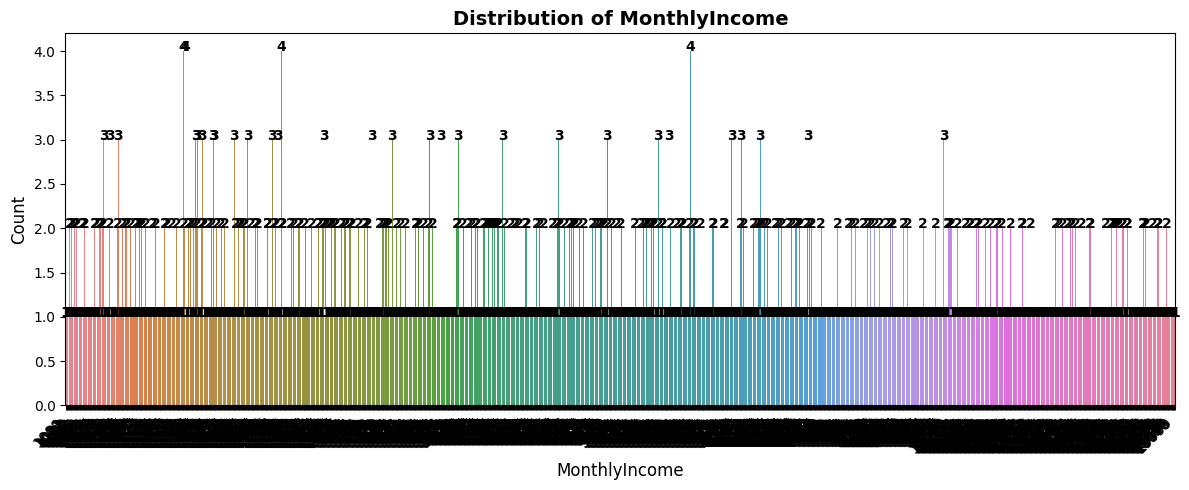

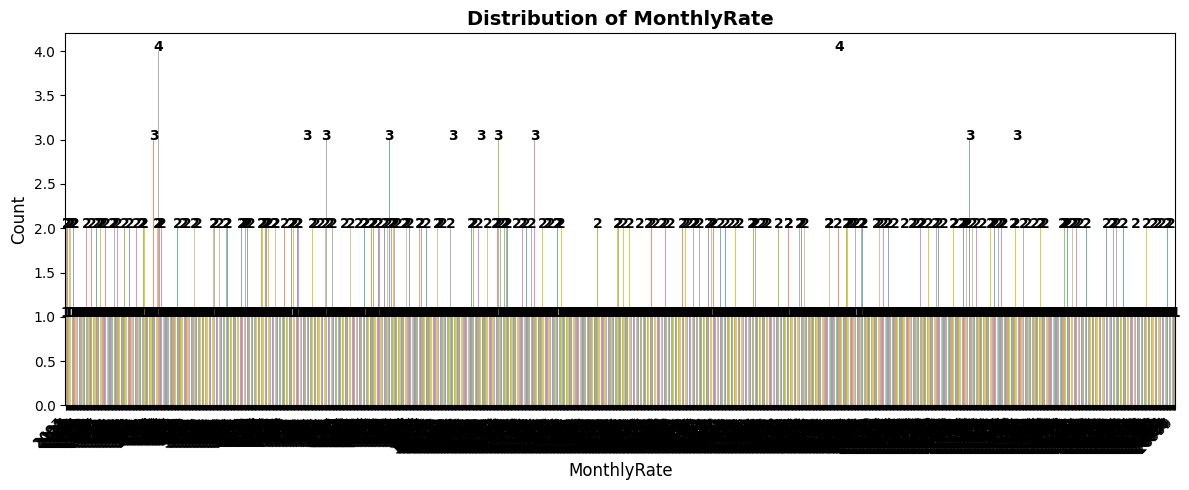

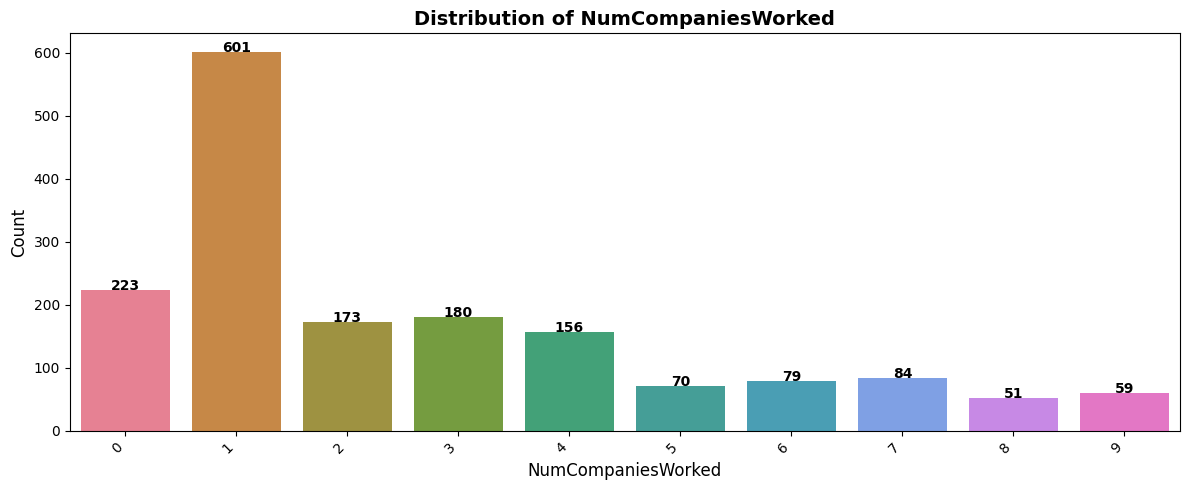

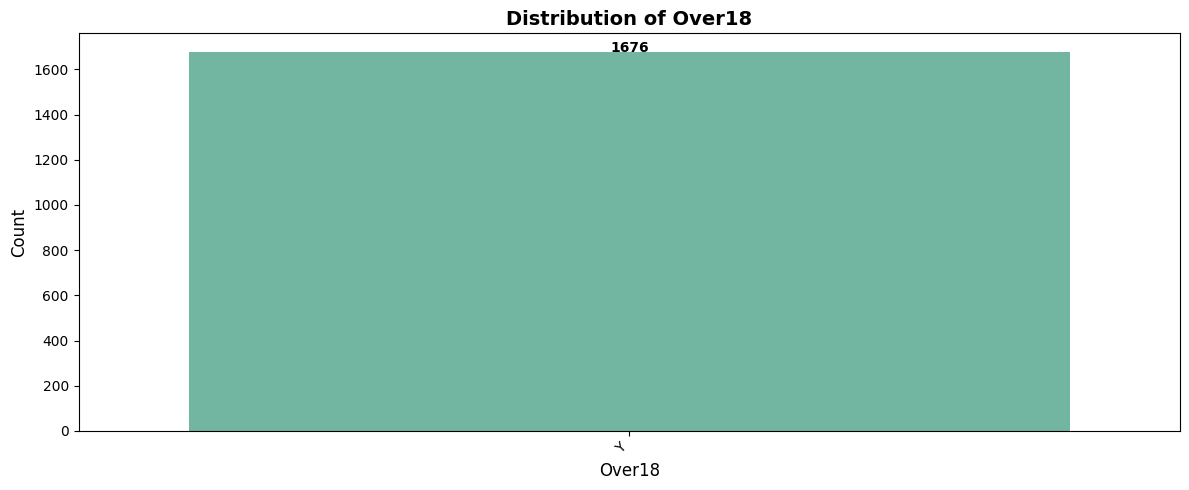

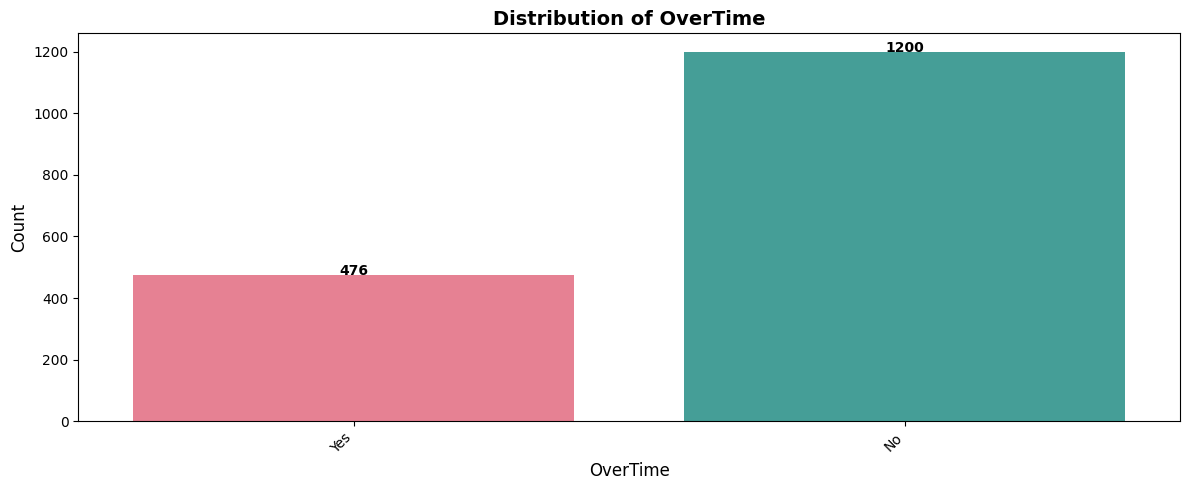

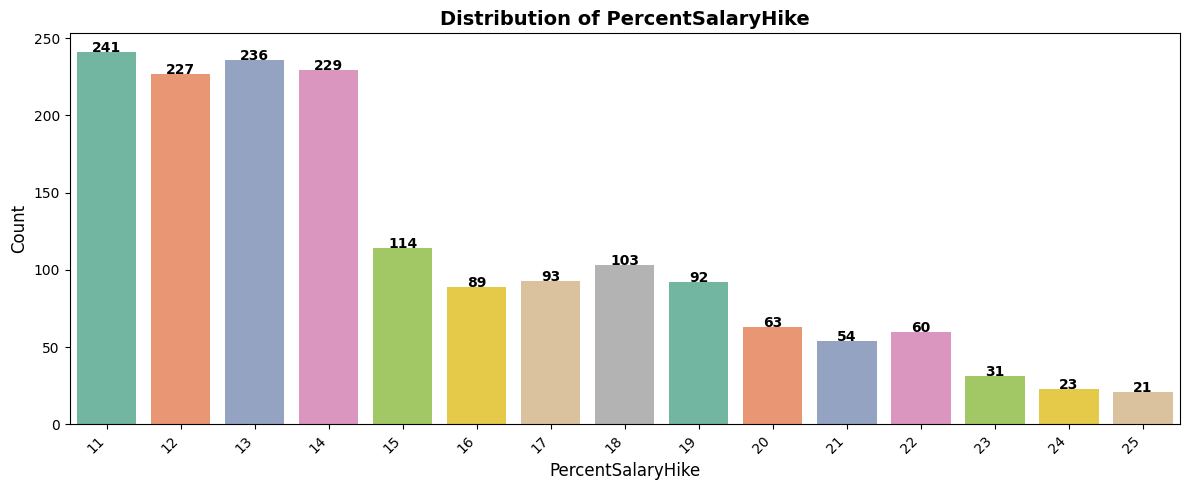

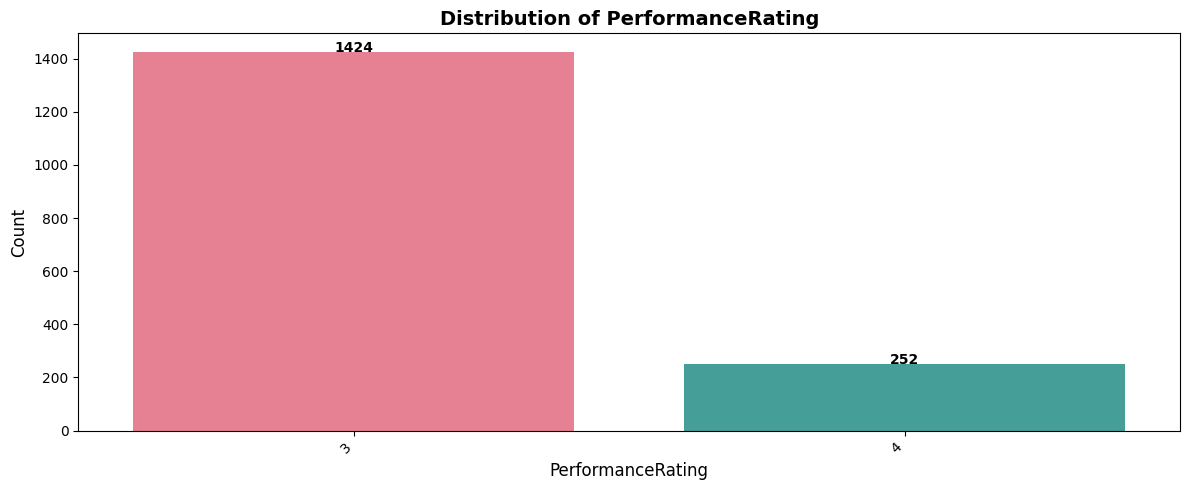

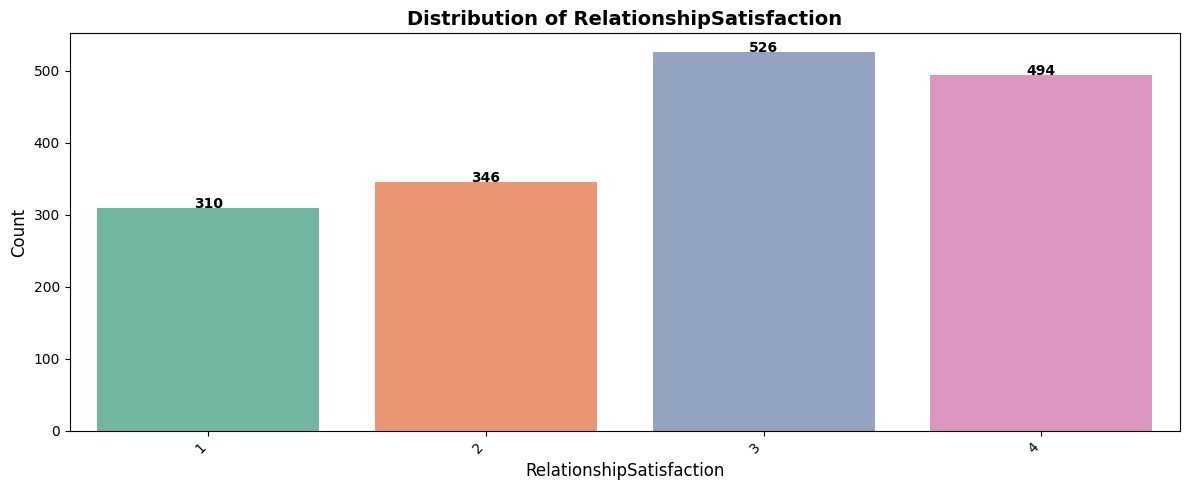

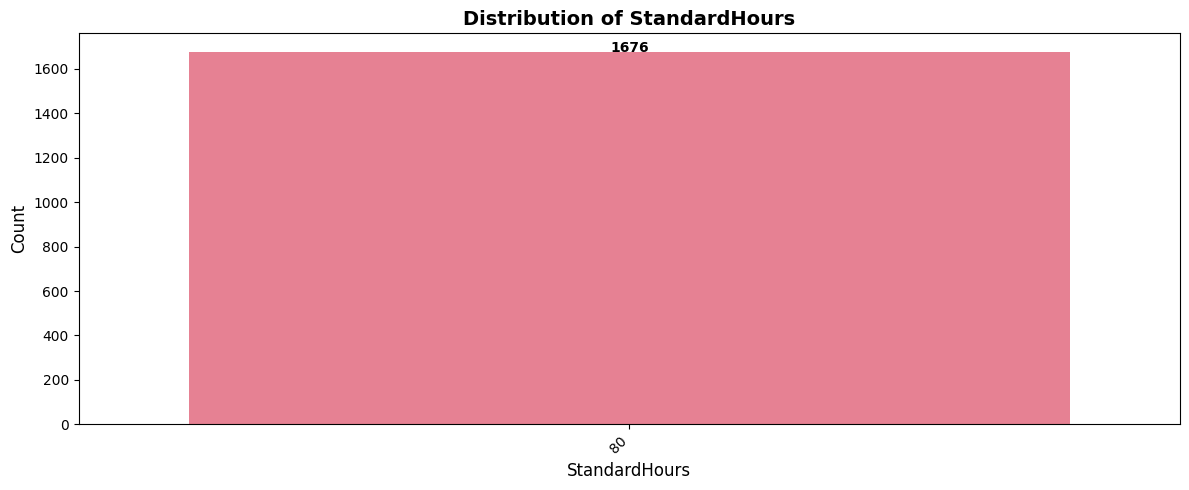

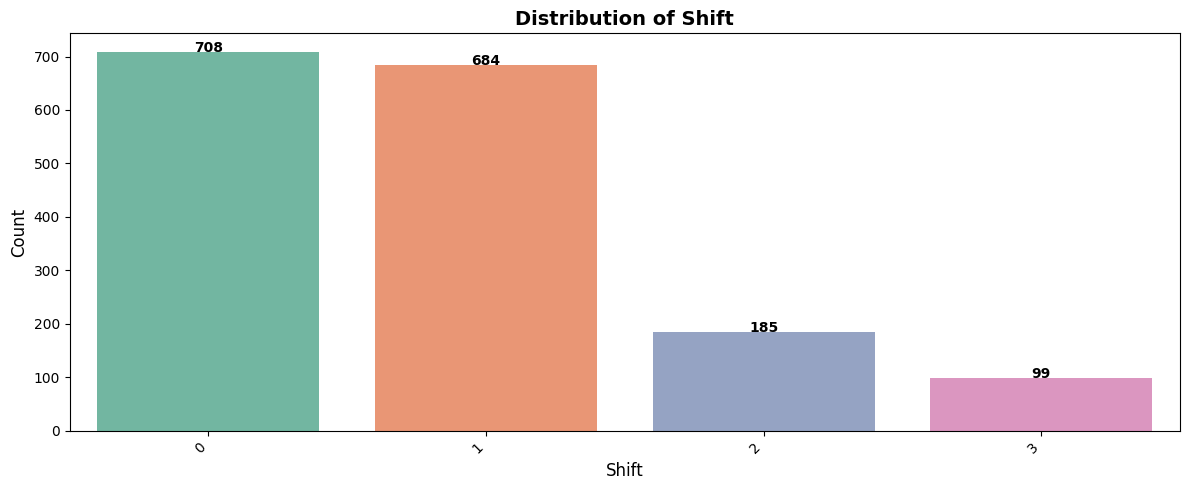

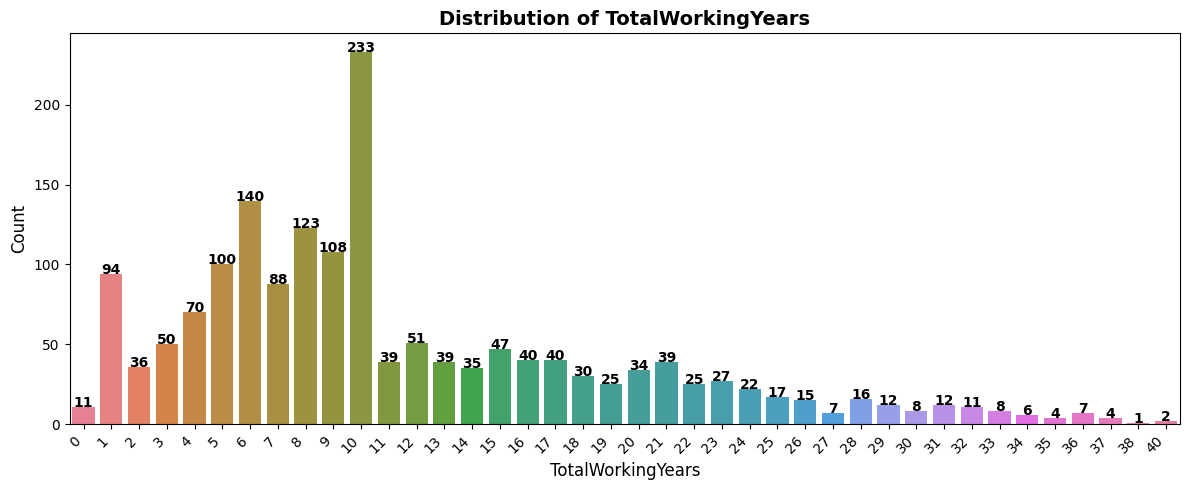

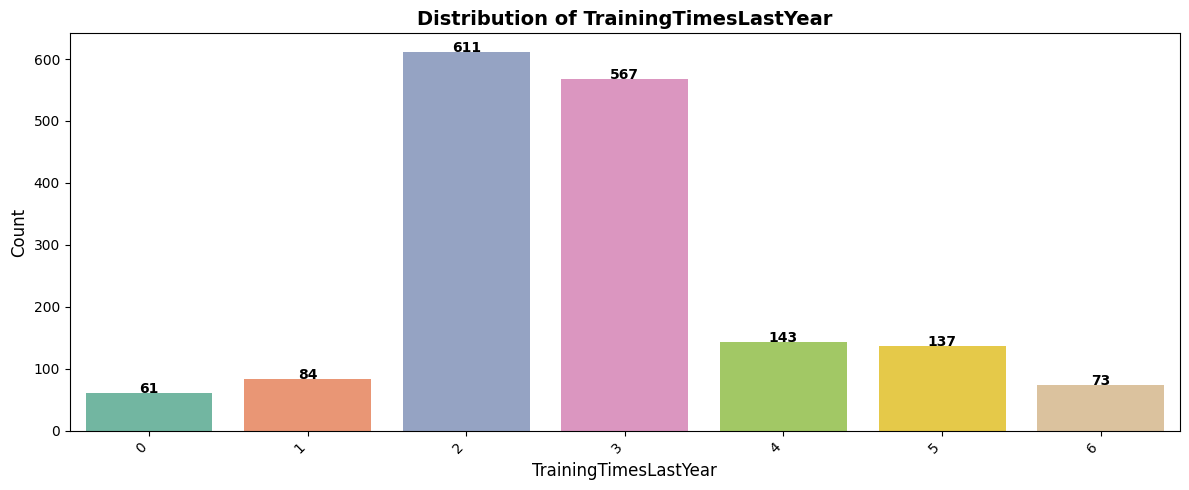

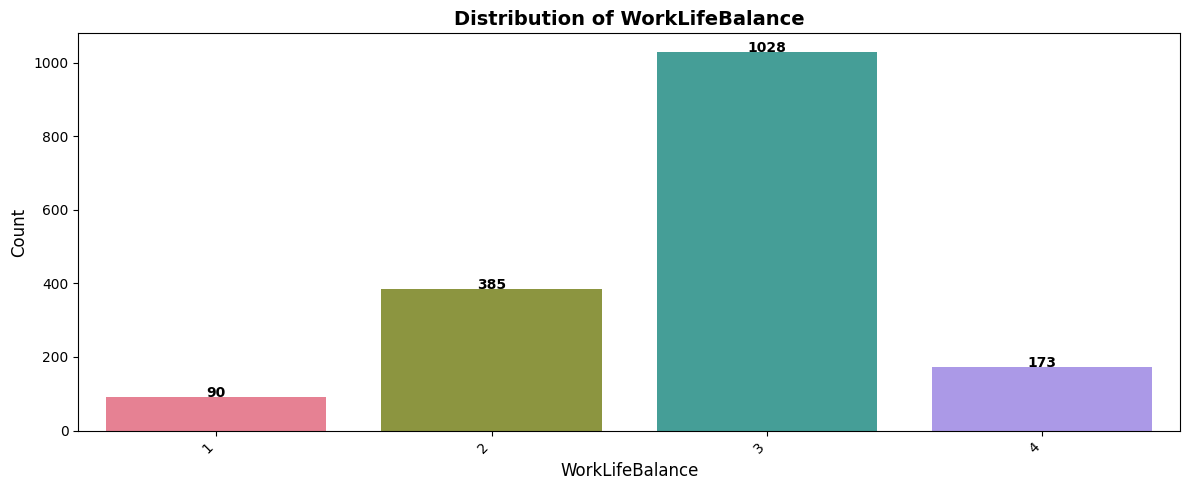

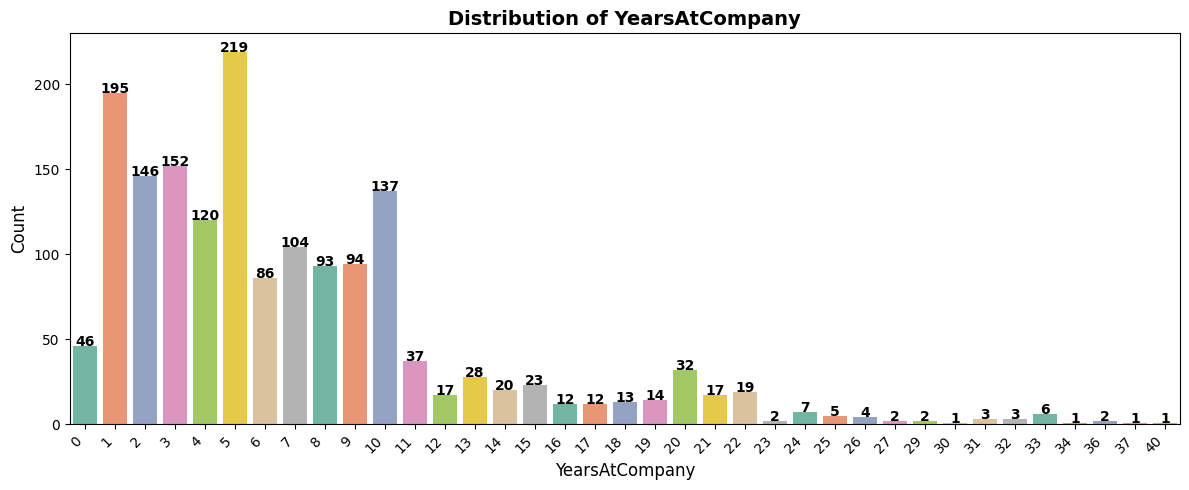

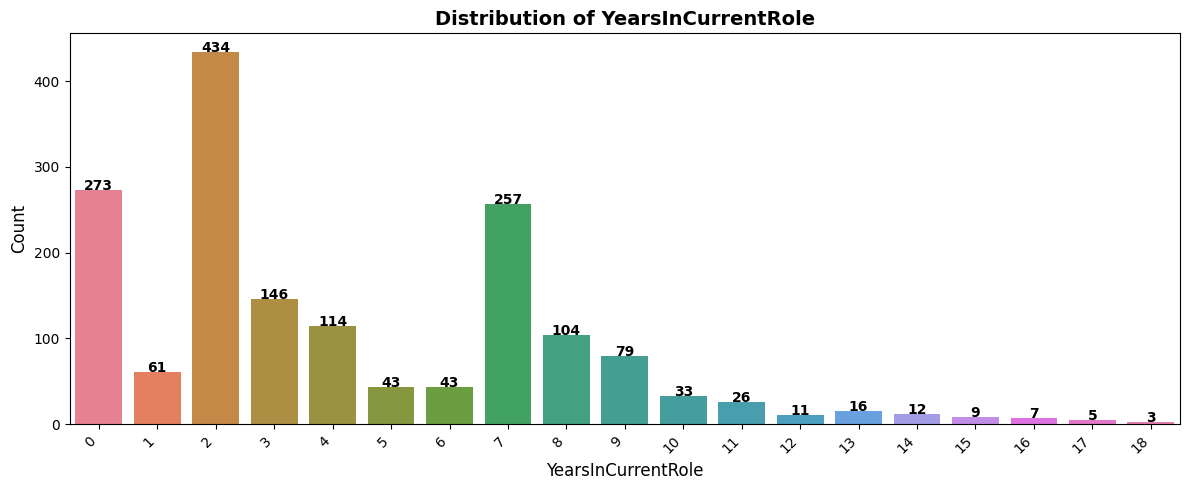

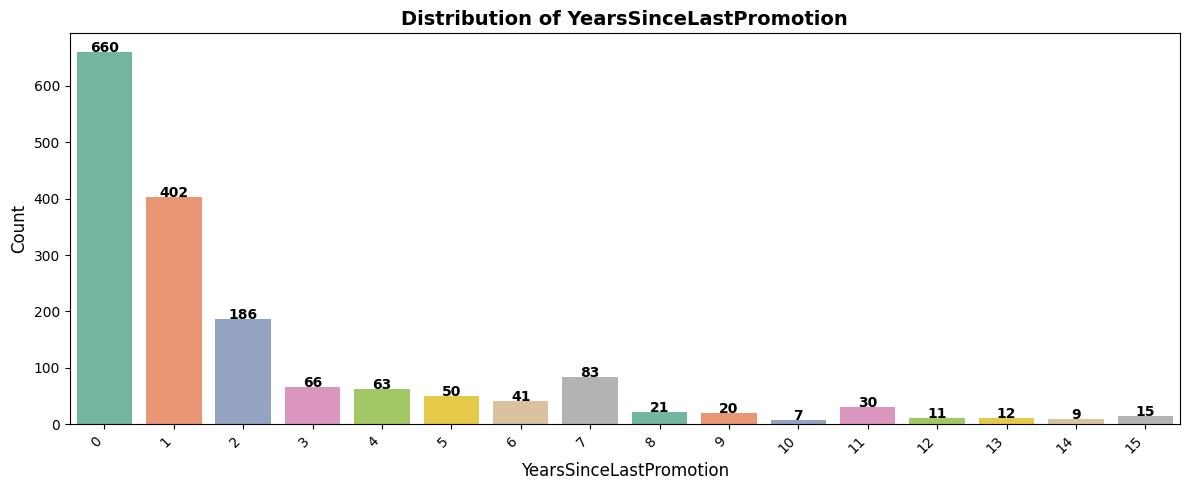

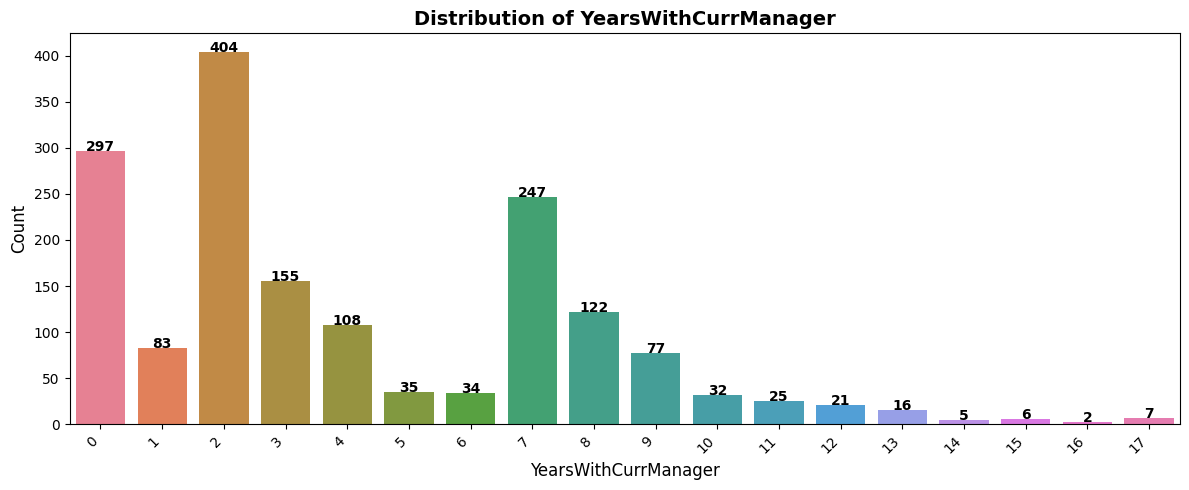

In [96]:
# Loop through each categorical column and plot its value counts
for i, column in enumerate(data_df.columns, start=1):
    plt.figure(figsize=(12, 5))
    
    # Custom palette with alternating colors for better visual distinction
    palette = sns.color_palette("Set2") if i % 2 == 0 else sns.color_palette("husl", len(data_df[column].unique()))
    
    # Create the count plot
    sns.countplot(data=data_df, x=column, palette=palette)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')

# Set custom title and labels
    plt.title(f"Distribution of {column}", fontsize=14, weight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Add count labels on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='baseline', 
                           fontsize=10, color='black', weight='bold')

# Display the plot
    plt.tight_layout()
    plt.show()

In [29]:
print(Counter(data['Attrition']))

Counter({'No': 1477, 'Yes': 199})


In [32]:
data = data.drop('EmployeeID', axis = 1)

## Train And Test Modele

In [34]:
encoder = LabelEncoder()
X = data.drop('Attrition', axis = 1).apply(lambda column: encoder.fit_transform(column) if  column.dtype == 'object' else column )
Y = data['Attrition']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Logistic Regression

In [51]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 86.30952380952381
Classification Report:               precision    recall  f1-score   support

          No       0.87      0.99      0.93       289
         Yes       0.57      0.09      0.15        47

    accuracy                           0.86       336
   macro avg       0.72      0.54      0.54       336
weighted avg       0.83      0.86      0.82       336



## Decision Tree Classification

In [54]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Decision Tree Classifier accuracy: 88.69047619047619
Classification Report:               precision    recall  f1-score   support

          No       0.90      0.98      0.94       289
         Yes       0.70      0.34      0.46        47

    accuracy                           0.89       336
   macro avg       0.80      0.66      0.70       336
weighted avg       0.87      0.89      0.87       336



## Random Forest Classification

In [57]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Random Forest Classifier accuracy: 88.69047619047619
Classification Report:               precision    recall  f1-score   support

          No       0.89      0.99      0.94       289
         Yes       0.85      0.23      0.37        47

    accuracy                           0.89       336
   macro avg       0.87      0.61      0.65       336
weighted avg       0.88      0.89      0.86       336



## SVM classification

In [62]:
# Create and train the SVM model with RBF kernel
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and classification report
print('SVM Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

SVM Accuracy:  87.79761904761905
Classification Report:               precision    recall  f1-score   support

          No       0.88      0.99      0.93       289
         Yes       0.80      0.17      0.28        47

    accuracy                           0.88       336
   macro avg       0.84      0.58      0.61       336
weighted avg       0.87      0.88      0.84       336



## Navie Bayes

In [65]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

The accuracy of Naive Bayes is: 71.72619047619048
Classification Report:               precision    recall  f1-score   support

          No       0.94      0.72      0.81       289
         Yes       0.29      0.72      0.42        47

    accuracy                           0.72       336
   macro avg       0.62      0.72      0.62       336
weighted avg       0.85      0.72      0.76       336



In [67]:
# Initialize the base classifier
deci_clf = RandomForestClassifier()

# Initialize the Bagging classifier
clf_bagging = BaggingClassifier(estimator=deci_clf, n_estimators=20, random_state=42)

# Fit the Bagging classifier on the training data
clf_bagging.fit(X_train, y_train)

# Make predictions using the Bagging classifier
y_pred = clf_bagging.predict(X_test)

# Print the accuracy of the Bagging classifier
print('The accuracy of the bagging classifier is:', accuracy_score(y_test, y_pred) * 100)

The accuracy of the bagging classifier is: 88.98809523809523


In [69]:
# Initialize the base classifier
deci_clf = RandomForestClassifier()

# Initialize the AdaBoost classifier
clf_boosting = AdaBoostClassifier(estimator=deci_clf, n_estimators=20, random_state=42)

# Fit the AdaBoost classifier on the training data
clf_boosting.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
y_pred = clf_boosting.predict(X_test)

# Print the accuracy of the AdaBoost classifier
print('The accuracy of the Boosting classifier is:', accuracy_score(y_test, y_pred) * 100)

The accuracy of the Boosting classifier is: 87.79761904761905


In [73]:

# Step 1: One-Hot Encode categorical columns (e.g., 'Gender')
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid dummy variable trap

# Step 2: Scale numeric features
# Use StandardScaler to standardize the numeric features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Define KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: List of classifiers and models
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]

# Step 5: Initialize lists to store results
cv_mean = []
accuracy = []
std = []

# Step 6: Loop through each model, perform cross-validation, and store results
for model in models:
    cv_result = cross_val_score(model, X_scaled, Y, cv=kfold, scoring="accuracy")
    cv_mean.append(cv_result.mean())  # Mean accuracy of cross-validation
    std.append(cv_result.std())  # Standard deviation of the cross-validation scores
    accuracy.append(cv_result)  # All accuracy scores

# Step 7: Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'CV Mean': cv_mean,
    'Std': std
}, index=classifiers)

# Display the results DataFrame
print(results_df)



                      CV Mean       Std
Linear SVM           0.924836  0.022461
Radial SVM           0.924251  0.021125
Logistic Regression  0.921254  0.022560
Decision Tree        0.873521  0.030452
Naive Bayes          0.766089  0.039475
Random Forest        0.915893  0.016416


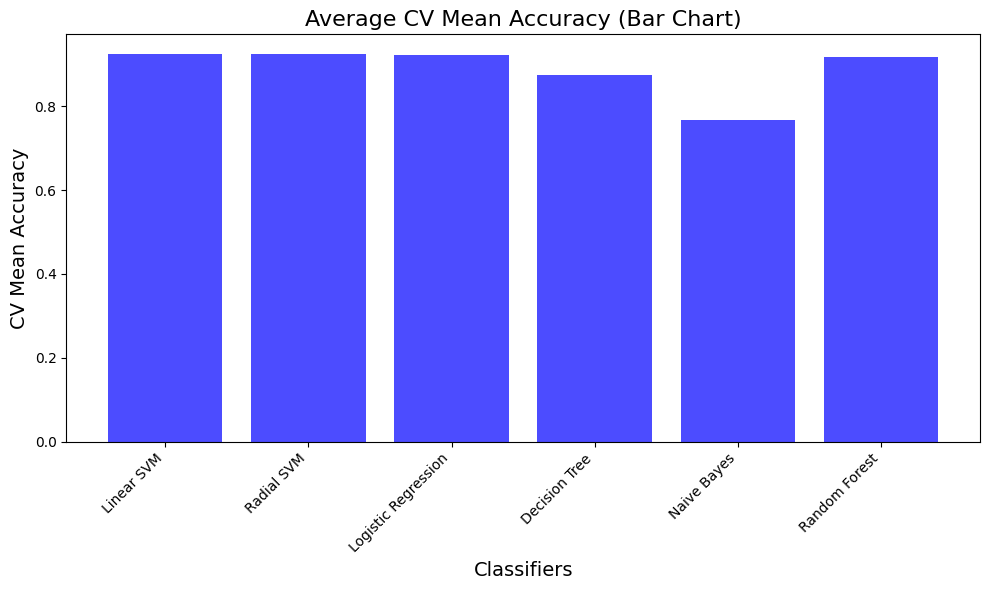

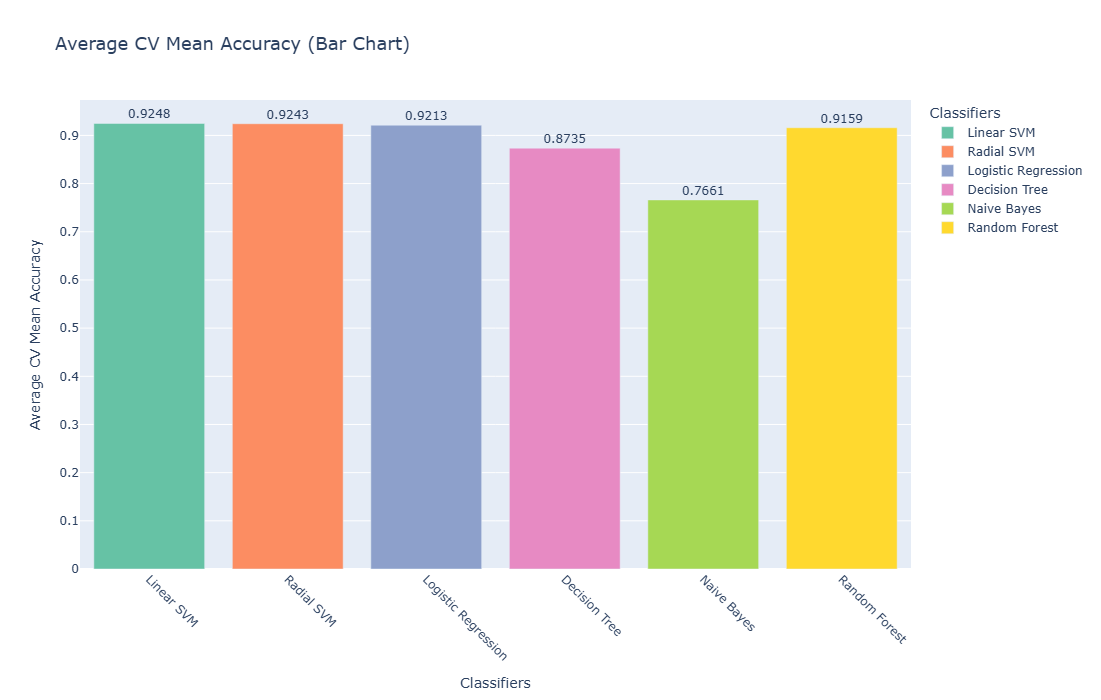

In [75]:
# Extract classifiers and their CV Mean values
classifiers = results_df.index.tolist()  # Classifier names
cv_mean = results_df['CV Mean'].tolist()  # CV Mean values

# --- Matplotlib Bar Chart ---
plt.figure(figsize=(10, 6))
plt.bar(classifiers, cv_mean, color='blue', alpha=0.7)
plt.title('Average CV Mean Accuracy (Bar Chart)', fontsize=16)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('CV Mean Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# --- Plotly Bar Chart ---
fig = px.bar(
    results_df.reset_index(),  # Reset index to access classifiers
    x='index',
    y='CV Mean',
    text='CV Mean',
    title='Average CV Mean Accuracy (Bar Chart)',
    labels={'index': 'Classifiers', 'CV Mean': 'Average Accuracy'},
    color='index',  # Optional: Color bars by classifier name
    color_discrete_sequence=px.colors.qualitative.Set2,
)

fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(
    xaxis_title="Classifiers",
    yaxis_title="Average CV Mean Accuracy",
    title_font_size=18,
    xaxis_tickangle=45,  # Rotate x-axis labels
    height=700,
    width=1100,
)
fig.show()